Exercise 1 Chapter 8
----------

I'll start reproducing figure 8.3

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from scipy.stats import binom

# Functions

## Efficieny function

In [6]:
e = np.vectorize(lambda A, E, E0 : 1/(1+np.exp(-A*(E-E0))))

## Posterior function

In [7]:
def L_ij(A,E0,df, e):
    p = e(A,df['Energy'],E0)        
    N = df['Trials']
    r = df['Successes']
    if (p<0).any():
        L = -1
    else:
        L = np.prod([(p**r)*(1-p)**(N-r)])
    return L

In [8]:
def Post(A,E0,df, e):
    L = np.array([[L_ij(Ai,E0i,df, e) for E0i in E0] for Ai in A])
    return L/np.sum(L)

## Region detection function

In [9]:
def region(P, th):
    P_sorted = np.argsort(P, axis=None)[::-1]
    P_cum = np.cumsum(np.sort(P, axis=None)[::-1])
    idx = np.unravel_index(P_sorted[:len(P_cum[P_cum<th])], P.shape)
    return idx

# Example 8.5

## Data

In [8]:
Energy = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
Trials = [100, 100, 100, 100, 100, 1000, 1000, 1000]
Successes = [0, 4, 20, 58, 92, 987, 995, 998]
df_ex = pd.DataFrame({'Energy':Energy, 'Trials':Trials, 'Successes':Successes})

## Grid

In [8]:
E0 = np.linspace(1.5,2.5,101)
A = np.linspace(2.5,4.5,51)

AA, EE0 = np.meshgrid(A,E0)

## Posterior

In [9]:
P = Post(A,E0,df_ex, e)

## Accepted regions

In [10]:
idx_068 = region(P, 0.68)
idx_090 = region(P, 0.90)
idx_095 = region(P, 0.95)

## Marginalized probabilities

In [11]:
P_E0 = np.sum(P, axis = 0)
P_A = np.sum(P, axis = 1)

## Mode

In [12]:
E0_mp = np.round(E0[np.argmax(P_E0)],3)
A_mp = np.round(A[np.argmax(P_A)], 3)
(E0_mp, A_mp)

(1.89, 3.62)

## Plots

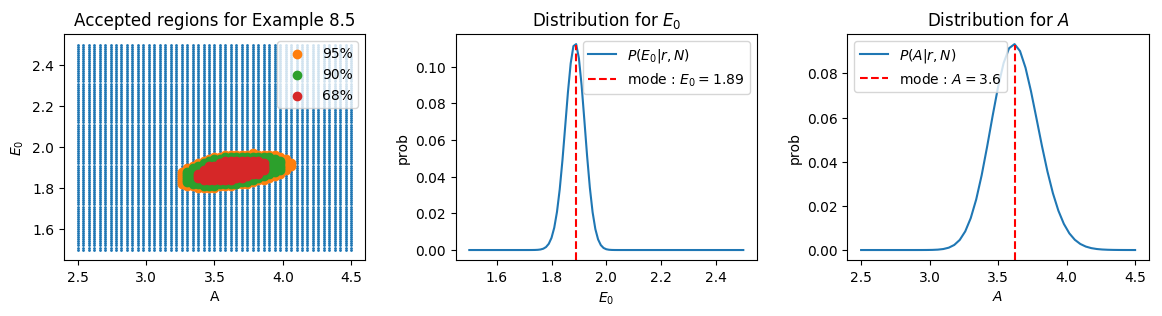

In [13]:
gs = plt.GridSpec(1,3, figure=plt.figure(None,(14,3), dpi = 100), wspace=0.3)

ax1 = plt.subplot(gs[0])
ax1.scatter(AA,EE0, s = 1)
ax1.scatter(AA[0,idx_095[0]], EE0[idx_095[1],0], label ='95%')
ax1.scatter(AA[0,idx_090[0]], EE0[idx_090[1],0], label ='90%')
ax1.scatter(AA[0,idx_068[0]], EE0[idx_068[1],0], label ='68%')
plt.xlabel('A')
plt.ylabel('$E_0$')
plt.title('Accepted regions for Example 8.5')
plt.legend()

ax2 = plt.subplot(gs[1])
ax2.plot(E0, P_E0, label = '$P(E_0|r,N)$')
ax2.axvline(x = E0[np.argmax(P_E0)], ymin = 0, ymax = np.max(P_E0)/plt.ylim()[1], color = 'red',
            linestyle = '--', label = 'mode : $E_0 = 1.89$')
plt.xlabel('$E_0$')
plt.ylabel('prob')
plt.title('Distribution for $E_0$')
plt.legend()

ax3 = plt.subplot(gs[2])
ax3.plot(A, P_A, label = '$P(A|r,N)$')
ax3.axvline(x = A[np.argmax(P_A)], ymin = 0, ymax = np.max(P_A)/plt.ylim()[1], color = 'red',
            linestyle = '--', label = 'mode : $A = 3.6$')
plt.xlabel('$A$')
plt.ylabel('prob')
plt.title('Distribution for $A$')
plt.legend(loc = 'upper left')


# Exercise 8.1

## Data

In [10]:
Energy = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
Trials = [100, 100, 100, 100, 100, 100, 100, 100]
Successes = [0, 4, 22, 55, 80, 97, 99, 99]
df_E1 = pd.DataFrame({'Energy':Energy, 'Trials':Trials, 'Successes':Successes})

## Grid

In [11]:
E0 = np.linspace(1.0,3.0,101)
A = np.linspace(2.0,4.0,51)

AA, EE0 = np.meshgrid(A,E0)

## Posterior

In [12]:
P = Post(A,E0,df_E1, e)

## Acepted regions

In [13]:
idx_068 = region(P, 0.68)
idx_090 = region(P, 0.90)
idx_095 = region(P, 0.95)

## Marginalized probabilities

In [14]:
P_E0 = np.sum(P, axis = 0)
P_A = np.sum(P, axis = 1)

## Mode

In [15]:
E0_mp = np.round(E0[np.argmax(P_E0)],3)
A_mp = np.round(A[np.argmax(P_A)], 3)
(E0_mp, A_mp)

(1.96, 3.0)

## Plots

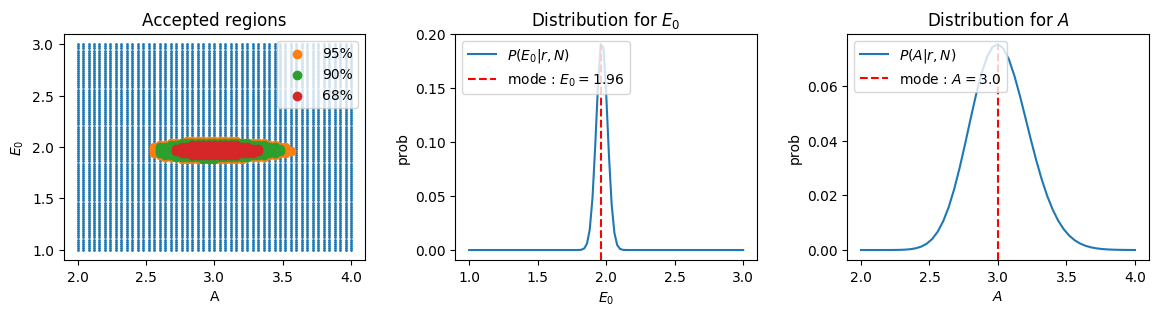

In [16]:
gs = plt.GridSpec(1,3, figure=plt.figure(None,(14,3), dpi = 100), wspace=0.3)

ax1 = plt.subplot(gs[0])
ax1.scatter(AA,EE0, s = 1)
ax1.scatter(AA[0,idx_095[0]], EE0[idx_095[1],0], label ='95%')
ax1.scatter(AA[0,idx_090[0]], EE0[idx_090[1],0], label ='90%')
ax1.scatter(AA[0,idx_068[0]], EE0[idx_068[1],0], label ='68%')
plt.xlabel('A')
plt.ylabel('$E_0$')
plt.title('Accepted regions')
plt.legend()

ax2 = plt.subplot(gs[1])
ax2.plot(E0, P_E0, label = '$P(E_0|r,N)$')
ax2.axvline(x = E0[np.argmax(P_E0)], ymin = 0, ymax = np.max(P_E0)/plt.ylim()[1], color = 'red',
            linestyle = '--', label = f'mode : $E_0 = {E0_mp}$')
plt.xlabel('$E_0$')
plt.ylabel('prob')
plt.title('Distribution for $E_0$')
plt.legend(loc = 'upper left')

ax3 = plt.subplot(gs[2])
ax3.plot(A, P_A, label = '$P(A|r,N)$')
ax3.axvline(x = A[np.argmax(P_A)], ymin = 0, ymax = np.max(P_A)/plt.ylim()[1], color = 'red',
            linestyle = '--', label = f'mode : $A = {A_mp}$')
plt.xlabel('$A$')
plt.ylabel('prob')
plt.title('Distribution for $A$')
plt.legend(loc = 'upper left')


# Exercise 8.2

## Efficiency function

In [17]:
def e_2(A, E, E0):
    res = A*(E-E0)
    return max(np.sin(res),0)

e_2 = np.vectorize(e_2)

## Grid

In [18]:
E0 = np.linspace(0.3,0.6,51)
A = np.linspace(0.3,0.6,51)

AA, EE0 = np.meshgrid(A,E0)

## Posterior

In [19]:
P = Post(A,E0,df_E1, e_2)

## Acepted regions

In [20]:
idx_068 = region(P, 0.68)
idx_090 = region(P, 0.90)
idx_095 = region(P, 0.95)

## Marginalized probabilities

In [21]:
P_E0 = np.sum(P, axis = 0)
P_A = np.sum(P, axis = 1)

## Mode

In [22]:
E0_mp = np.round(E0[np.argmax(P_E0)],3)
A_mp = np.round(A[np.argmax(P_A)], 3)
(E0_mp, A_mp)

(0.498, 0.426)

## Plots

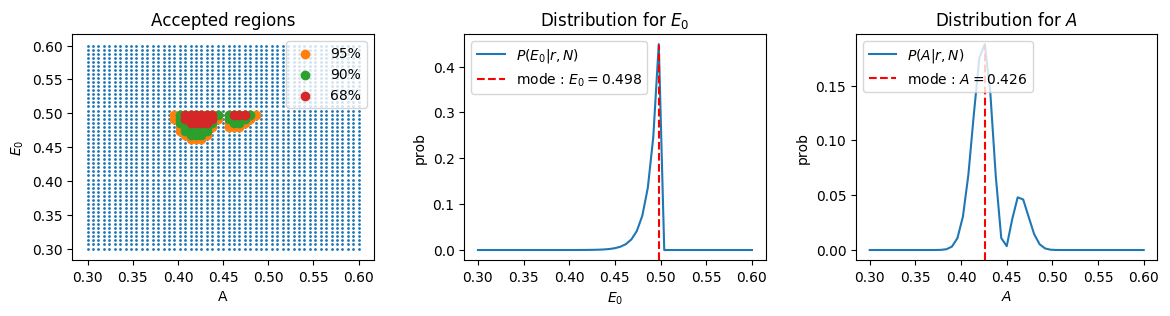

In [23]:
gs = plt.GridSpec(1,3, figure=plt.figure(None,(14,3), dpi = 100), wspace=0.3)

ax1 = plt.subplot(gs[0])
ax1.scatter(AA,EE0, s = 1)
ax1.scatter(AA[0,idx_095[0]], EE0[idx_095[1],0], label ='95%')
ax1.scatter(AA[0,idx_090[0]], EE0[idx_090[1],0], label ='90%')
ax1.scatter(AA[0,idx_068[0]], EE0[idx_068[1],0], label ='68%')
plt.xlabel('A')
plt.ylabel('$E_0$')
plt.title('Accepted regions')
plt.legend()

ax2 = plt.subplot(gs[1])
ax2.plot(E0, P_E0, label = '$P(E_0|r,N)$')
ax2.axvline(x = E0[np.argmax(P_E0)], ymin = 0, ymax = np.max(P_E0)/plt.ylim()[1], color = 'red',
            linestyle = '--', label = f'mode : $E_0 = {E0_mp}$')
plt.xlabel('$E_0$')
plt.ylabel('prob')
plt.title('Distribution for $E_0$')
plt.legend(loc = 'upper left')

ax3 = plt.subplot(gs[2])
ax3.plot(A, P_A, label = '$P(A|r,N)$')
ax3.axvline(x = A[np.argmax(P_A)], ymin = 0, ymax = np.max(P_A)/plt.ylim()[1], color = 'red',
            linestyle = '--', label = f'mode : $A = {A_mp}$')
plt.xlabel('$A$')
plt.ylabel('prob')
plt.title('Distribution for $A$')
plt.legend(loc = 'upper left')


# Model comparisson

In [29]:
s = df_E1['Successes']/(df_E1['Trials'])
en = df_E1['Energy']

In [42]:
E0_sigmoid, A_sigmoid = 2.02, 2.98
E0_sin, A_sin = 0.4737, 0.4211

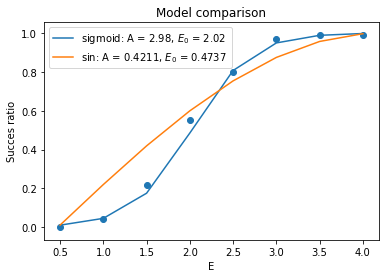

In [43]:
plt.scatter(en,s)
plt.plot(en, e(A_sigmoid,df_E1['Energy'],E0_sigmoid), label = f'sigmoid: A = {A_sigmoid}, $E_0$ = {E0_sigmoid} ')
plt.plot(en, e_2(A_sin,df_E1['Energy'],E0_sin), label = f'sin: A = {A_sin}, $E_0$ = {E0_sin} ')
plt.xlabel('E')
plt.ylabel('Succes ratio')
plt.title('Model comparison')
plt.legend()